# STL to extract trend and seasonality



In this notebook we demonstrate how to use STL to extract seasonality and trend from a time series. 

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Create-Datasets" from this repo.

## Data Set Synopsis

The timeseries is collected between January 1992 and May 2016.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import STL

sns.set_context("talk")

# Load data

In [2]:
df = pd.read_csv(
    "example_retail_sales.csv", parse_dates=["ds"], index_col=["ds"]
)

In [4]:
df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


Text(0, 0.5, 'Retail Sales')

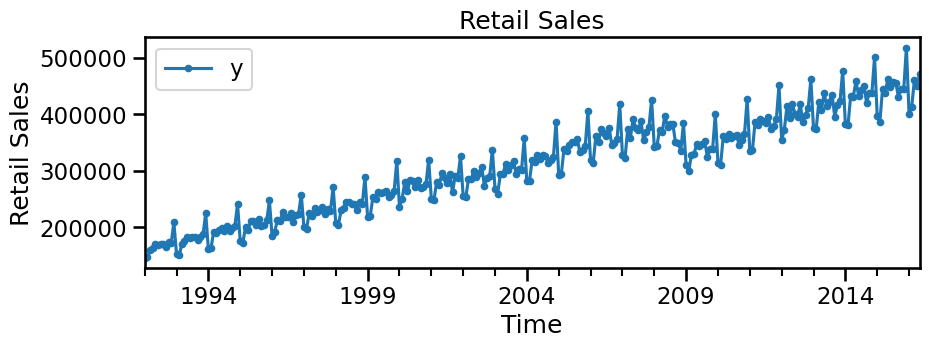

In [7]:
ax = df.plot(marker=".", figsize=[10, 3])
ax.set_title("Retail Sales")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")

# STL parameters

STL has a number of parameters which mostly parameterise the multiple applications of LOESS that occur in the algorithm. The default values of these parameters are typically good enough and the only parameters that requires some attention are the `seasonal`, `period`, and `robust` parameter.

`seasonal`: Determines the window size for LOESS used when smoothing the seasonal component (i.e, the cycle-subseries). As a reminder, the cycle-subseries is the time series formed by the sequence of values from the same period in the seasonal cycle (e.g., the sequence of all the values which occured on January over each year, the sequence of all the values which occured on February over each year, etc.). Hence, this parameter determines how smooth the seasonal component is for the same period (e.g., every January) across multiple seasonal cycles (e.g, multiple years).

`period`: The periodicity of the seasonal component (e.g., for yearly seasonality and monthly data, this would be 12 because the seasonal pattern repeats every 12 periods). This variable is used to determine the cycle-subseries and also in the low pass filtering step of the algorithm.

`robust`: A flag to use robustness weights during regression in LOESS. This ensures robustness to outliers.

For completeness we describe the other parameters in more detail below and illustrate where adjusting some of these parameters could be useful later in the notebook.

The main parameters of STL come about from the repeated use of LOESS to smooth various time series in the algorithm. LOESS is used in the following areas in the STL aglorithm, we specify the corresponding LOESS parameters:

1) Smoothing the seasonal component (i.e., the seasonal cycle-subseries)
- `seasonal`: LOESS window size
- `seasonal_deg`: Degree of the polynomial to use when doing regression in LOESS. 
- `seasonal_jump`: Reduces computational cost of applying LOESS by not evaluating LOESS at every data point but instead evaluating it at a given point and then skipping the number of points specified by this parameter before evaluating LOESS again at a new data point. The intermediate skipped points are evaluated using a linear interpolation instead.

2) Low pass filtering the cycle-subseries
- `low_pass`: LOESS window size
- `low_pass_deg`: Degree of the polynomial to use when doing regression in LOESS. 
- `low_pass_jump`: Reduces computational cost of applying LOESS by not evaluating LOESS at every data point but instead evaluating it at a given point and then skipping the number of points specified by this parameter before evaluating LOESS again at a new data point. The intermediate skipped points are evaluated using a linear interpolation instead.

3) Smoothing the trend component after de-seasonalising the data
- `trend`: LOESS window size
- `trend_deg`: Degree of the polynomial to use when doing regression in LOESS. 
- `trend_jump`: Reduces computational cost of applying LOESS by not evaluating LOESS at every data point but instead evaluating it at a given point and then skipping the number of points specified by this parameter before evaluating LOESS again at a new data point. The intermediate skipped points are evaluated using a linear interpolation instead.

# Using STL to extract trend and seasonality

In [8]:
# Perform STL decomposition
res = STL(
    endog=df["y"],  # Y values
    period=12,  # The periodicity of the seasonal component
    seasonal=7,  # Determines the window size for LOESS used
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

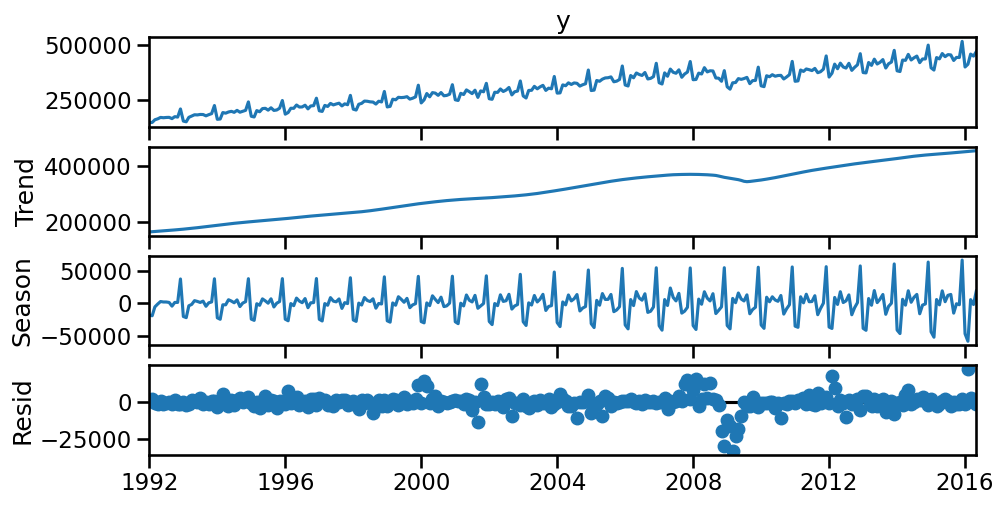

In [10]:
# Plot the full decomposition
plt.rc("figure", figsize=(10, 5))
plt.rc("font", size=5)
res.plot();

In [7]:
# Extract the trend and seasonality individually
df["trend"] = res.trend
df["seasonal"] = res.seasonal
df.head()

,y,trend,seasonal
ds,,,
1992-01-01,146376,163507.268049,-18105.934264
1992-02-01,147079,164270.425274,-19220.032341
1992-03-01,159336,165042.317260,-5396.563294
1992-04-01,163669,165822.245976,-885.576431
1992-05-01,170068,166609.427740,2929.056385


Text(0, 0.5, 'Seasonal component')

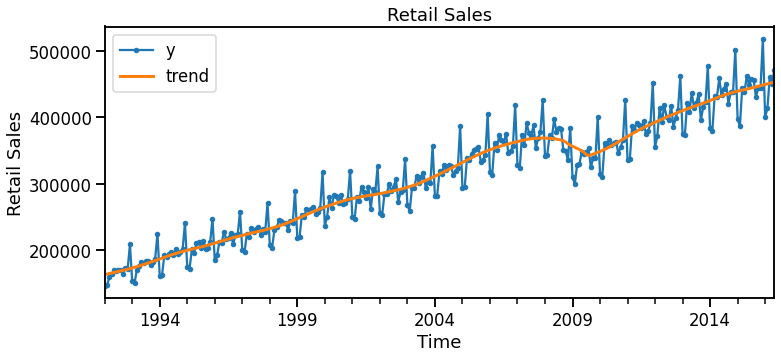

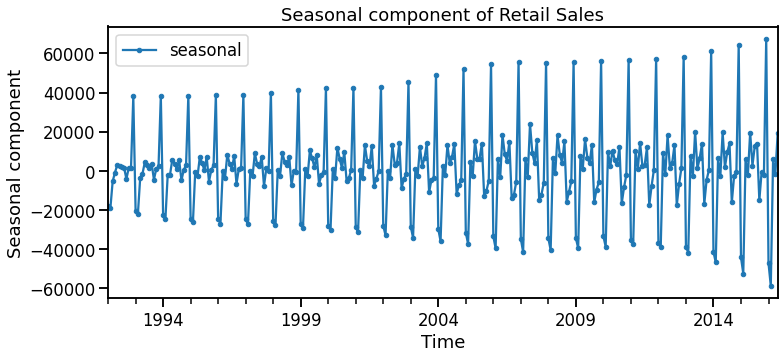

In [9]:
# Plot the trend
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="y", marker=".", ax=ax)
df.plot(y="trend", ax=ax, linewidth=3)
ax.set_title("Retail Sales")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")


# Plot seasonality
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="seasonal", marker=".", ax=ax)
ax.set_title("Seasonal component of Retail Sales")
ax.set_xlabel("Time")
ax.set_ylabel("Seasonal component")

In [28]:
import pandas as pd

# Load the dataset
file_path = 'AirPassenger.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()



,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [29]:
# Perform STL decomposition
res = STL(
    endog=data["Pax"],  # Y values
    period=12,  # The periodicity of the seasonal component
    seasonal=7,  # Determines the window size for LOESS used
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

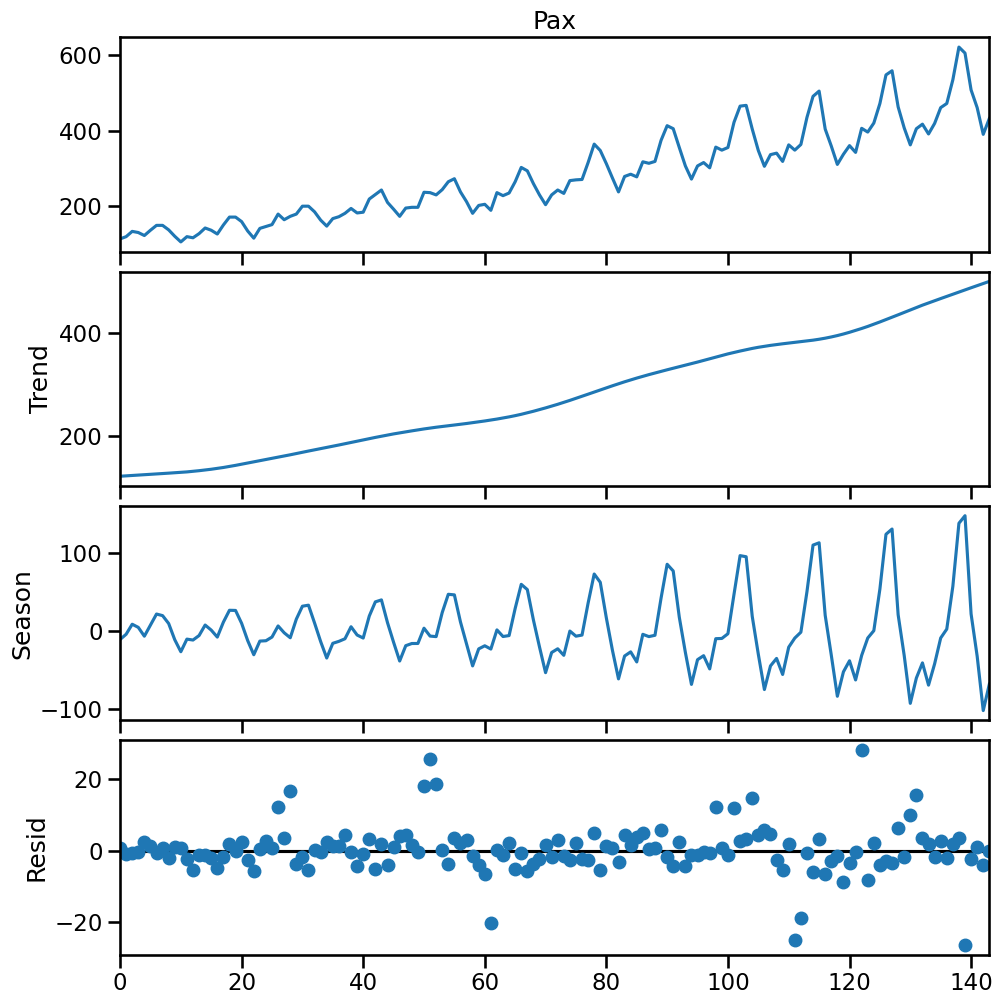

In [30]:
# Plot the full decomposition
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
res.plot();

### Slight Variability:
There is some variability in the spread of the residuals, but it appears to be relatively consistent throughout the plot. This suggests that the variance of the residuals is relatively stable over time, which is a positive sign indicating that heteroscedasticity is likely not an issue here.

### Outliers:
There are a few points that stand out, especially those with larger residuals (both positive and negative). These could be outliers or data points where the model did not perform as well. These outliers might warrant further investigation to understand if they are due to unusual events or errors.

### Conclusion:
This residual plot suggests that the model has done a reasonably good job at capturing the key patterns in the data, leaving behind mostly random noise. The lack of strong patterns in the residuals is a positive indicator. However, the few outliers observed might need further analysis to ensure they are not indicative of any model deficiencies or significant data anomalies.


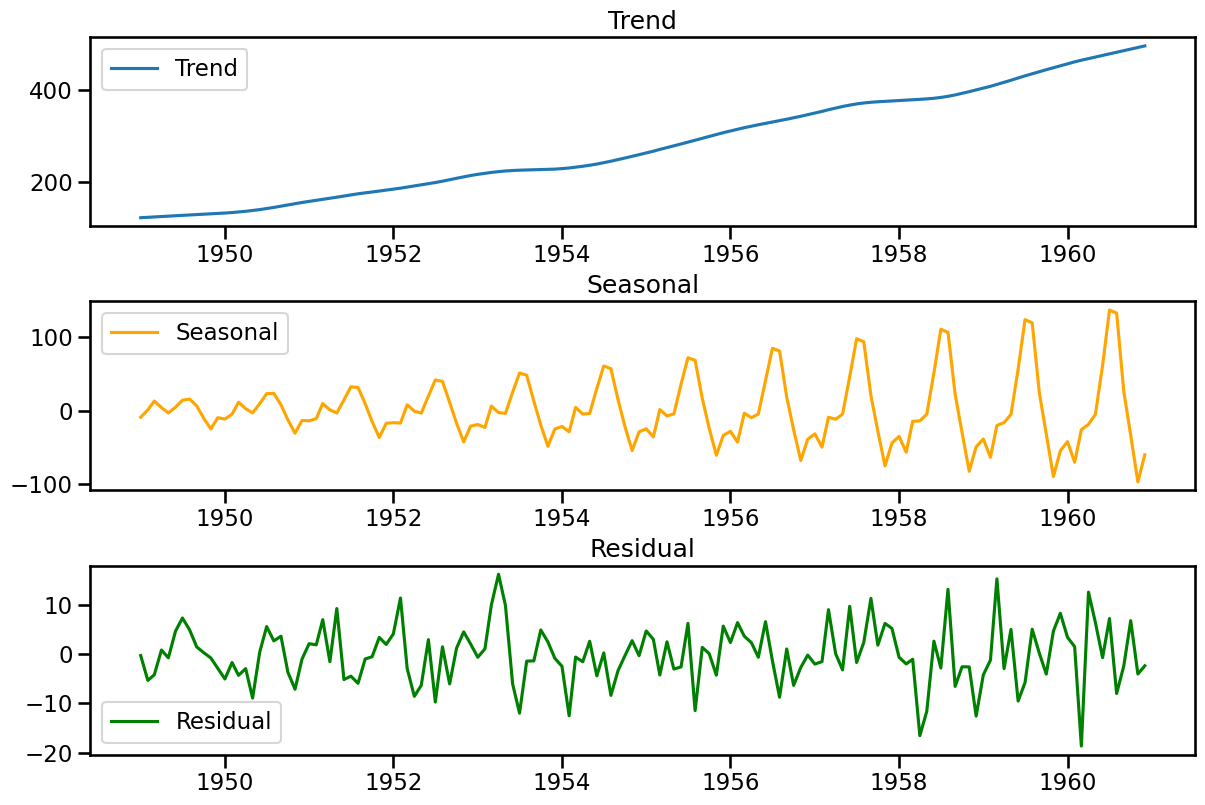

In [11]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Convert 'Year-Month' to datetime and set it as the index
data['Year-Month'] = pd.to_datetime(data['Year-Month'], format='%Y-%b') # Year and Abb month name
data.set_index('Year-Month', inplace=True)

# Apply STL Decomposition
stl = STL(data['Pax'], seasonal=13)
result = stl.fit()

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

ax1.plot(result.trend, label='Trend')
ax1.set_title('Trend')
ax1.legend()

ax2.plot(result.seasonal, label='Seasonal', color='orange')
ax2.set_title('Seasonal')
ax2.legend()

ax3.plot(result.resid, label='Residual', color='green')
ax3.set_title('Residual')
ax3.legend()

plt.tight_layout()
plt.show()



### Why 13?

The seasonal parameter is typically set to 12 (the number of months in a year) to capture yearly seasonality in monthly data.  
However, to improve the accuracy of the seasonal estimate, it's often incremented by 1 (hence, 13) to provide a slightly smoother and more robust estimation of the seasonal pattern.

**Centering the Seasonal Component:**
When performing smoothing, especially in time series, it's important that the smoothing window can be symmetrically centered on each point in the series. An odd window size ensures that there is an equal number of points before and after the central point. This symmetry is crucial for accurately estimating the seasonal effect at each point in time.


### Trend Component:
The trend line shows a clear upward trajectory, indicating a consistent increase in the number of passengers over time. This is likely due to growth in the airline industry or increasing demand for air travel.

### Seasonal Component:
The seasonal pattern reflects the recurring fluctuations in passenger numbers within each year. For instance, certain months may consistently show higher or lower passenger numbers due to factors like holidays or weather.

### Residual Component:
The residuals represent the noise or unexplained variance in the data after accounting for the trend and seasonal components. Ideally, these should not exhibit any clear pattern, indicating that the decomposition effectively captured the main structures in the data.


In [12]:
# Load the dataset
file_path = 'daily-total-female-births.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()



,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


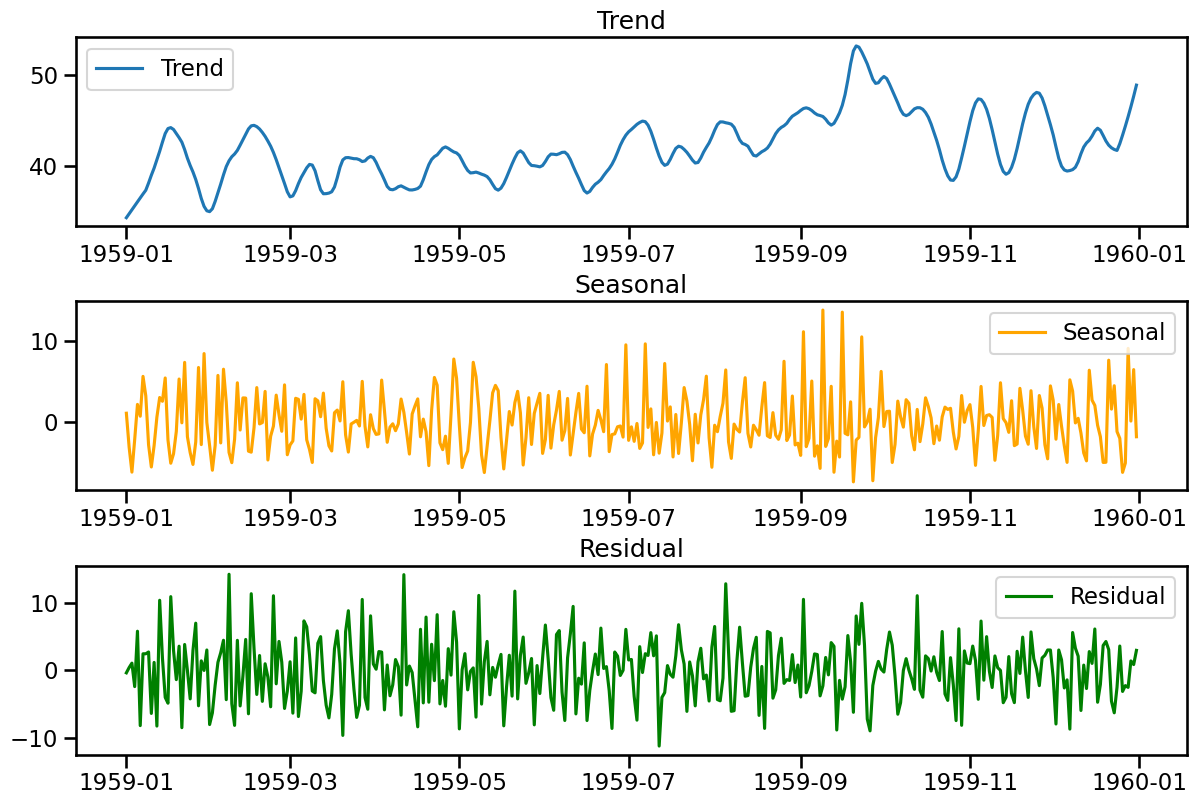

In [13]:
# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Apply STL Decomposition
stl = STL(data['Births'], seasonal=7)  # Assuming weekly seasonality in daily data
result = stl.fit()

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

ax1.plot(result.trend, label='Trend')
ax1.set_title('Trend')
ax1.legend()

ax2.plot(result.seasonal, label='Seasonal', color='orange')
ax2.set_title('Seasonal')
ax2.legend()

ax3.plot(result.resid, label='Residual', color='green')
ax3.set_title('Residual')
ax3.legend()

plt.tight_layout()
plt.show()


### Trend Component:
The trend line likely shows a relatively stable pattern with minor variations. Since the data is for a shorter duration (less than a year), we may not observe a strong upward or downward trend. Instead, the trend line smooths out short-term fluctuations, highlighting the more persistent underlying pattern in the data.

### Seasonal Component:
The seasonal component reflects these weekly cycles. You may see consistent peaks and troughs over each week, suggesting that certain days might consistently have higher or lower birth counts, possibly due to societal, medical, or natural factors.
### Residual Component:
The residuals should ideally appear as random noise without any clear pattern. If this is the case, it indicates that the decomposition has effectively captured the main structures (trend and seasonality) in the data. Any patterns in the residuals could suggest that there are other factors or influences not captured by the trend and seasonal components.

In [33]:
train_data = pd.read_csv("train_data.csv")
train_data.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


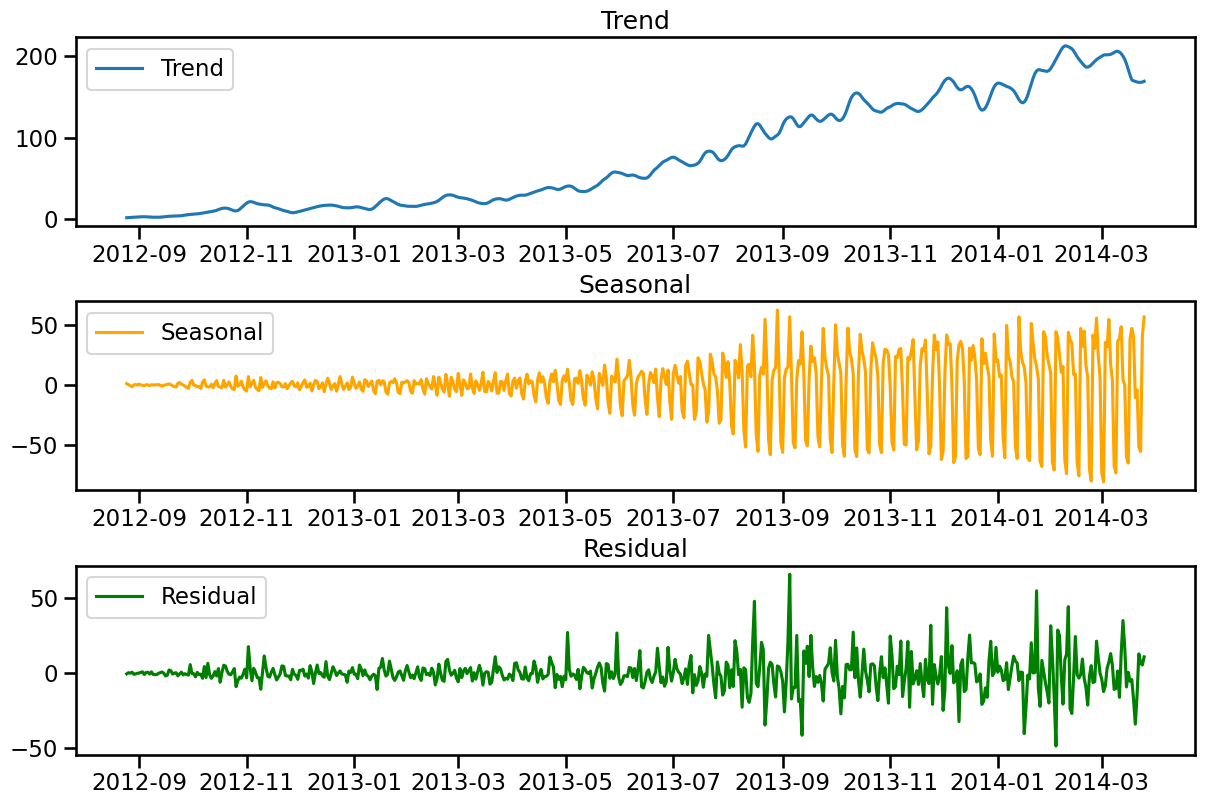

In [23]:
# Convert 'Date' to datetime and set it as the index
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)

# Apply STL Decomposition
stl = STL(train_data['count'], seasonal=7)  # Assuming weekly seasonality in daily data
result = stl.fit()

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

ax1.plot(result.trend, label='Trend')
ax1.set_title('Trend')
ax1.legend()

ax2.plot(result.seasonal, label='Seasonal', color='orange')
ax2.set_title('Seasonal')
ax2.legend()

ax3.plot(result.resid, label='Residual', color='green')
ax3.set_title('Residual')
ax3.legend()

plt.tight_layout()
plt.show()


In [34]:
# Perform STL decomposition
res = STL(
    endog=train_data["count"],  # Y values
    period=7,  # The periodicity of the seasonal component
    #seasonal=7,  # Determines the window size for LOESS used
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

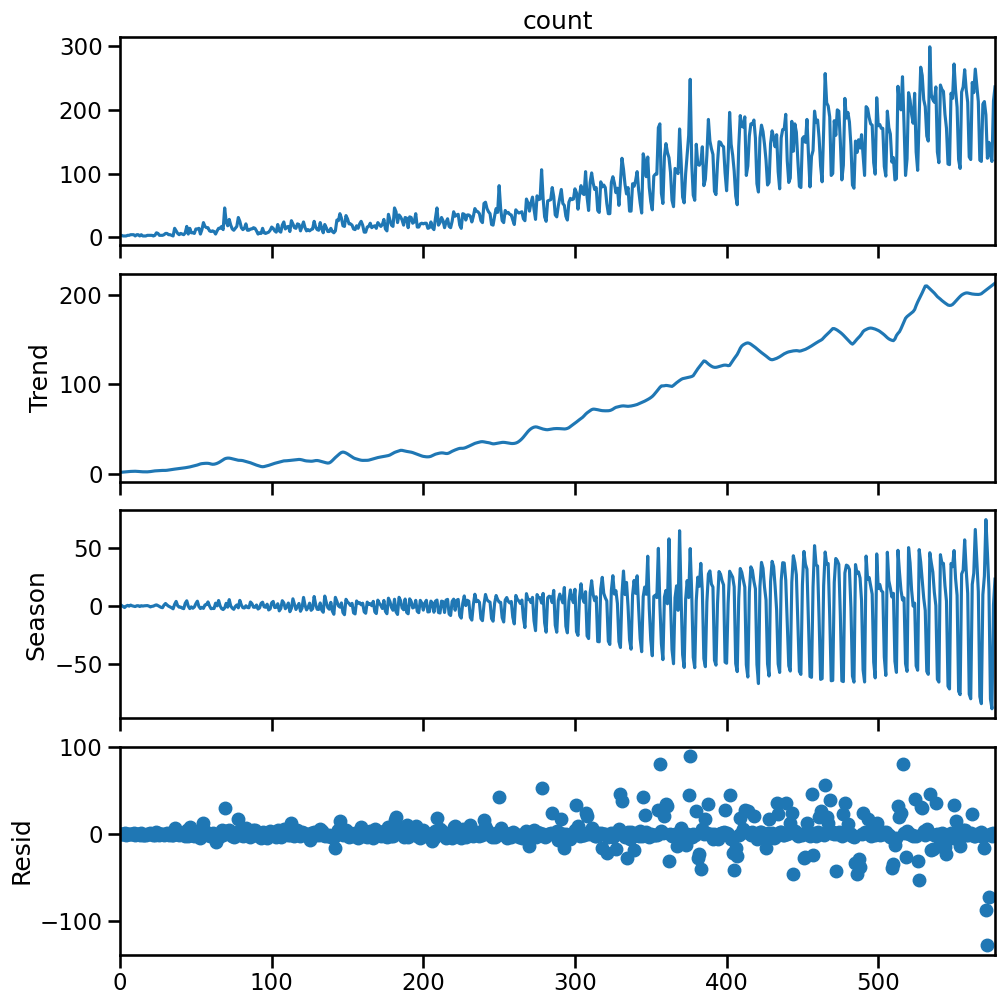

In [35]:
# Plot the full decomposition
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
res.plot();

### Heteroscedasticity:
There seems to be a slight increase in the spread of the residuals as you move from left to right on the plot. This indicates that the variance of the residuals is not constant over time (a phenomenon known as heteroscedasticity). This might suggest that the variability in your data is changing over time, which the STL decomposition might not have fully accounted for.

### Outliers at the end:
Towards the right end of the plot (around 500-520 on the x-axis), there are some larger residuals, both positive and negative. These outliers might indicate that there were some unusual observations that the STL model couldn't explain well. It could be due to sudden events or changes not captured by the trend or seasonal components.

### Conclusion:
While the residuals are mostly centered around zero and randomly distributed, the increasing spread and presence of outliers suggest that there may be additional variability or factors in the data that the STL model hasn't fully captured. You might want to investigate those outliers further or consider if a different model or additional adjustments could better capture this variability.
